In [26]:
# This jupyter notebook is from FastAI deep learning course part 2.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch 

from fastai import vision
import json, pdb
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
from pathlib import Path

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
torch.cuda.set_device(0)
torch.backends.cudnn.benchmark=True

In [3]:
class_data = pd.read_csv('pklot_class_data.csv')
bbox_data = pd.read_csv('pklot_bbox_data.csv')

In [4]:
data = class_data.merge(bbox_data, left_on='image_path', right_on='image_path')

In [5]:
data.head()

,image_path,occupied,rotated_bbox
0,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 ...,651 636 141 83 -34 705 563 139 77 -44 732 480 ...
1,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 ...,651 636 141 83 -34 705 563 139 77 -44 732 480 ...
2,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 ...,651 636 141 83 -34 705 563 139 77 -44 732 480 ...
3,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 ...,651 636 141 83 -34 705 563 139 77 -44 732 480 ...
4,PKLot/PKLot/UFPR04/Rainy/2013-01-18/2013-01-18...,1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 ...,651 636 141 83 -34 705 563 139 77 -44 732 480 ...


In [6]:
class_data_bunch = vision.ImageDataBunch.from_df(path='.', df=data).transform

In [17]:
class_data_bunch = (vision.ImageItemList.from_df(path='.', df=data, cols='image_path')).random_split_by_pct(valid_pct=0.2, seed=0).label_from_df(label_delim=' ').transform(size=128, padding_mode='zeros').databunch(bs=64, num_workers=4)

In [18]:
class_data_bunch

ImageDataBunch;

Train: LabelList (9933 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;1;1;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0,0;1;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0,1;1;1;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1,1;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1,1;1;0;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1
Path: .;

Valid: LabelList (2483 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;1;0;0;0;1;1;1;1;1;1;1;1;1;1;1;0;1;0;1;1;0;1;0;0;1;0;0;1;1;1;1;1;1;1;1;1;1;1;0;1;0;0;1;0;1;0;1;0;1;1;1;0;1;0;0;0;1;0;0;1;1,1;0;0;1;1;1;0;1;1;0;1;1;0;0;1;1;1;1;0;1;0;1;1;1;0;1;0;0;0;1;0;1;0;1;1;0;1;0;0

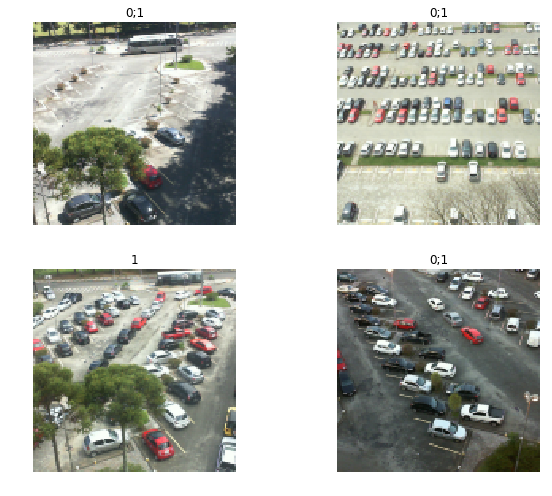

In [19]:
class_data_bunch.show_batch(rows=2, figsize=(9, 7))

In [20]:
model = vision.models.resnet34
learn = vision.create_cnn(data=class_data_bunch, arch=model)

In [21]:
learn.fit_one_cycle(cyc_len=5, max_lr=1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss
1,0.187845,0.140598
2,0.125434,0.148868
3,0.099276,0.080909
4,0.067377,0.071862
5,0.052508,0.066553


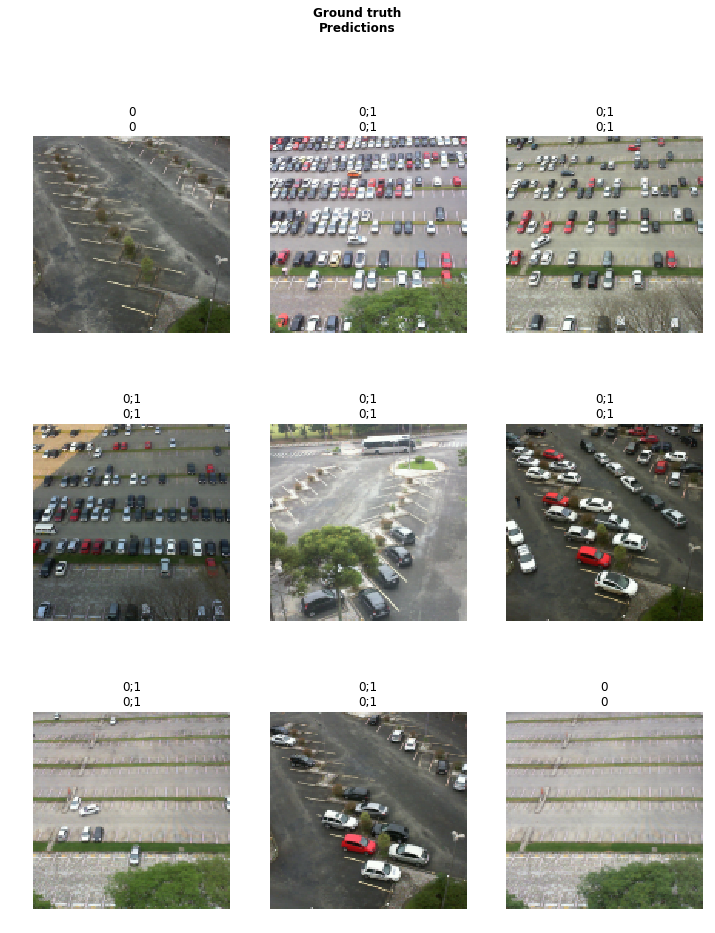

In [22]:
learn.show_results(rows=3, figsize=(12,15))

In [23]:
learn.lr_find(start_lr=1e-5, num_it=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.25E-05


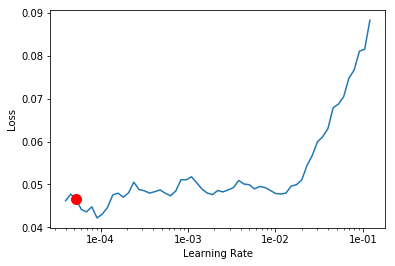

In [24]:
learn.recorder.plot()

In [25]:
learn.load('mini_train')

Learner(data=ImageDataBunch;

Train: LabelList (9933 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;1;1;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0,0;1;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0,1;1;1;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1,1;0;0;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1,1;1;0;0;0;0;0;0;0;1;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;1
Path: .;

Valid: LabelList (2483 items)
x: ImageItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;1;1;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;1;1;1;1;1;1;1;1;1;1;1;1;0;0;0;0;0;0;1;0;0;0;1;1;1;1;1;1;1;1;1;1;1;0;1;0;1;1;0;1;0;0;1;0;0;1;1;1;1;1;1;1;1;1;1;1;0;1;0;0;1;0;1;0;1;0;1;1;1;0;1;0;0;0;1;0;0;1;1,1;0;0;1;1;1;0;1;1;0;1;1;0;0;1;1;1;1;0;1;0;1;1;1;0;1;0;0;0;1;0;1;